### 복습

In [1]:
import numpy as np
import os
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [2]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

In [5]:
count_vec = CountVectorizer()
tdm = count_vec.fit_transform(sent)
print(count_vec.vocabulary_)
print(tdm.toarray())

{'휴일': 16, '오늘': 7, '서쪽': 5, '중심': 12, '으로': 8, '폭염': 13, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 11, '피해서': 14, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 15}
[[0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1]
 [1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1]]


In [9]:
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(sent)
print(tfidf_vec.vocabulary_)
print(tfidf.toarray())

{'휴일': 16, '오늘': 7, '서쪽': 5, '중심': 12, '으로': 8, '폭염': 13, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 11, '피해서': 14, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 15}
[[0.         0.32412345 0.         0.         0.32412345 0.32412345
  0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
  0.32412345 0.2306165  0.         0.         0.2306165 ]
 [0.36469323 0.         0.36469323 0.36469323 0.         0.
  0.         0.         0.         0.         0.36469323 0.25948224
  0.         0.25948224 0.36469323 0.36469323 0.25948224]]


In [11]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [13]:
print(cosine_similarity(tfidf[0], tfidf[1]))
print(euclidean_distances(tfidf[0], tfidf[1]))

[[0.17952266]]
[[1.28099753]]


In [20]:
train_pos_path = '/home/jasper/.keras/datasets/aclImdb/train/pos/'
train_neg_path = '/home/jasper/.keras/datasets/aclImdb/train/neg/'

In [23]:
# os.listdir(train_pos_path)
data_pos = {}
data_pos['review'] = []

for i in os.listdir(train_pos_path):
    with open(train_pos_path + i, 'r', encoding = 'utf-8') as f:
        data_pos['review'].append(f.read())

data_pos = pd.DataFrame.from_dict(data_pos)

In [25]:
# os.listdir(train_pos_path)
data_neg = {}
data_neg['review'] = []

for i in os.listdir(train_neg_path):
    with open(train_neg_path + i, 'r', encoding = 'utf-8') as f:
        data_neg['review'].append(f.read())

data_neg = pd.DataFrame.from_dict(data_neg)

In [26]:
data_pos['sentiment'] = 1
data_neg['sentiment'] = 0

In [28]:
print(data_pos.head())
print(data_neg.head())

                                              review  sentiment
0  I would say that this film gives an insight to...          1
1  This is my favorite of the older Tom & Jerry c...          1
2  I find it so amazing that even after all these...          1
3  Debut? Wow--Cross-Eyed is easily one of the mo...          1
4  I first saw this movie when it came out in 199...          1
                                              review  sentiment
0  I loathed this film. The original Phantasm had...          0
1  but "Cinderella" gets my vote, not only for th...          0
2  I consider this film one of the worst in the N...          0
3  This movie still chills me to the bone thinkin...          0
4  As an Army veteran, I was deeply offended by t...          0


In [29]:
train_df = pd.concat([data_pos, data_neg], axis = 0)

In [31]:
print(train_df.shape)

(25000, 2)


In [32]:
review = train_df['review']

In [40]:
## word length EDA
tokenized_review = [r.split() for r in review]

In [42]:
print(len(tokenized_review))

25000


In [48]:
print(tokenized_review[0])

['I', 'would', 'say', 'that', 'this', 'film', 'gives', 'an', 'insight', 'to', 'the', 'trauma', 'that', 'a', 'young', 'mind', 'can', 'face', 'when', 'a', 'family', 'is', 'split', 'by', 'divorce', 'or', 'other', 'disaster.', 'I', 'would', 'highly', 'recommend', 'this', 'film', 'especially', 'to', 'parents', 'or', 'individuals', 'planning', 'to', 'have', 'a', 'family.<br', '/><br', '/>I', 'found', 'the', 'characters', 'to', 'be', 'appealing', 'and', 'highly', 'sympathetic', 'from', 'a', 'multitude', 'of', 'dimensions.<br', '/><br', '/>The', 'scary', 'monster', 'although', 'probably', 'not', 'scary', 'to', 'most', 'adults,', 'has', 'a', 'very', 'real', 'hint', 'of', 'what', 'the', 'overactive', 'imagination', 'of', 'a', 'child', 'who', 'is', 'facing', 'unknown', 'terrors', 'might', 'create.<br', '/><br', '/>I', 'found', 'the', 'film', 'to', 'be', 'delightful!']


In [43]:
tokenized_review_len = [len(t) for t in tokenized_review]

In [44]:
print(tokenized_review_len)

[99, 158, 436, 102, 314, 129, 221, 148, 110, 72, 25, 195, 159, 266, 516, 258, 663, 142, 613, 88, 469, 153, 140, 56, 162, 202, 74, 385, 131, 92, 125, 810, 126, 248, 149, 743, 77, 239, 211, 790, 261, 499, 86, 155, 147, 136, 207, 110, 147, 855, 168, 389, 454, 116, 220, 323, 370, 582, 108, 390, 119, 334, 72, 157, 313, 51, 176, 124, 714, 438, 250, 668, 293, 56, 120, 171, 467, 373, 190, 155, 306, 208, 156, 651, 126, 147, 283, 185, 202, 176, 235, 239, 124, 140, 475, 159, 118, 641, 178, 155, 125, 322, 213, 131, 170, 306, 325, 236, 105, 321, 131, 179, 291, 217, 203, 183, 133, 157, 375, 591, 169, 461, 196, 45, 119, 534, 156, 100, 205, 152, 160, 120, 81, 139, 300, 303, 285, 228, 720, 242, 234, 303, 54, 403, 131, 88, 179, 464, 124, 161, 176, 296, 168, 91, 158, 439, 107, 462, 170, 134, 120, 266, 144, 127, 98, 156, 125, 113, 419, 166, 87, 220, 83, 268, 220, 423, 119, 92, 364, 133, 140, 186, 109, 269, 117, 421, 144, 130, 138, 199, 126, 153, 156, 277, 203, 267, 52, 158, 153, 208, 66, 405, 67, 310, 126

In [50]:
alphabet_review= [a.replace(' ', '') for a in review]

In [51]:
alphabet_review_len = [len(a) for a in alphabet_review]

In [52]:
print(alphabet_review_len)

[473, 663, 2007, 512, 1339, 786, 1064, 684, 542, 394, 134, 851, 770, 1454, 2376, 1349, 3226, 634, 2967, 397, 2388, 839, 624, 264, 741, 963, 329, 1883, 587, 430, 519, 4048, 523, 1029, 625, 3685, 326, 1228, 922, 3549, 1152, 2203, 392, 656, 727, 525, 931, 540, 679, 4292, 697, 1902, 2209, 554, 1144, 1499, 1967, 2874, 457, 1886, 554, 1462, 294, 662, 1488, 254, 832, 516, 3380, 2230, 1233, 3291, 1250, 236, 589, 864, 2105, 1535, 863, 726, 1461, 868, 774, 2924, 561, 607, 1348, 824, 930, 849, 1060, 1166, 557, 563, 2135, 680, 583, 2990, 759, 715, 527, 1381, 947, 580, 767, 1416, 1434, 1058, 524, 1426, 624, 870, 1336, 980, 994, 793, 626, 738, 1853, 2696, 754, 2048, 909, 205, 504, 2678, 739, 542, 981, 633, 680, 573, 397, 609, 1347, 1255, 1503, 1037, 3684, 1021, 1116, 1478, 218, 1927, 570, 337, 855, 2228, 638, 732, 851, 1521, 724, 345, 814, 2143, 546, 2185, 850, 598, 544, 1251, 670, 573, 438, 715, 624, 511, 1993, 802, 375, 997, 331, 1438, 1105, 2077, 514, 372, 1708, 657, 651, 857, 496, 1254, 548, 200

In [5]:
## EDA 시작
import matplotlib.pyplot as plt

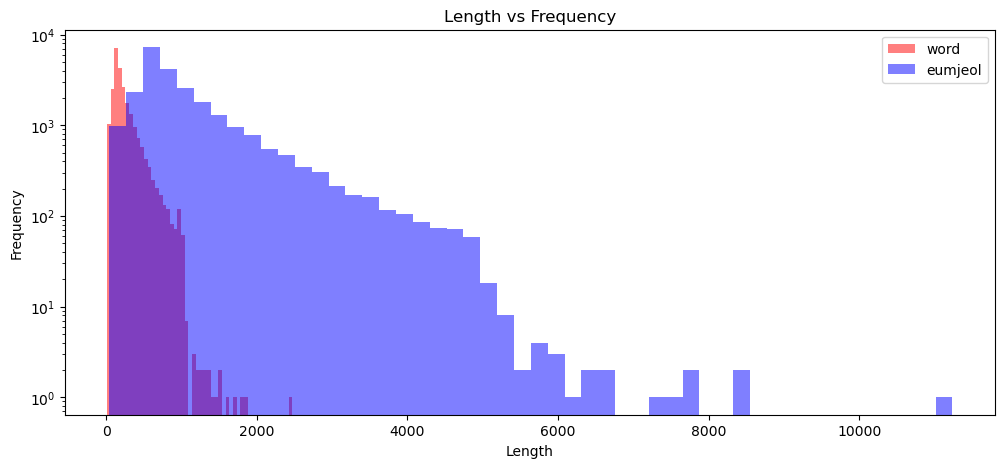

In [59]:
plt.figure(figsize=(12,5))
plt.hist(tokenized_review_len, bins=50, color='red', label='word', alpha = 0.5)
plt.hist(alphabet_review_len, bins=50, color='blue', label='eumjeol', alpha = 0.5)
plt.legend()
plt.yscale('log')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Length vs Frequency')
plt.show()

In [31]:
def word_summary(x, text):
    print(text + ' 최대 크기: {}'.format(np.max(x)))
    print(text + ' 최소 크기: {}'.format(np.min(x)))
    print(text + ' 평균 크기: {}'.format(np.mean(x)))
    print(text + ' 표준 편차: {}'.format(np.std(x)))
    print(text + ' 중간값: {}'.format(np.median(x)))
    print(text + ' 1사분위수: {}'.format(np.percentile(x, 25)))
    print(text + ' 3사분위수: {}'.format(np.percentile(x, 75)))

word_summary(tokenized_review_len, 'dd')

dd 최대 크기: 2470
dd 최소 크기: 10
dd 평균 크기: 233.78824
dd 표준 편차: 173.73034909796965
dd 중간값: 174.0
dd 1사분위수: 127.0
dd 3사분위수: 284.0


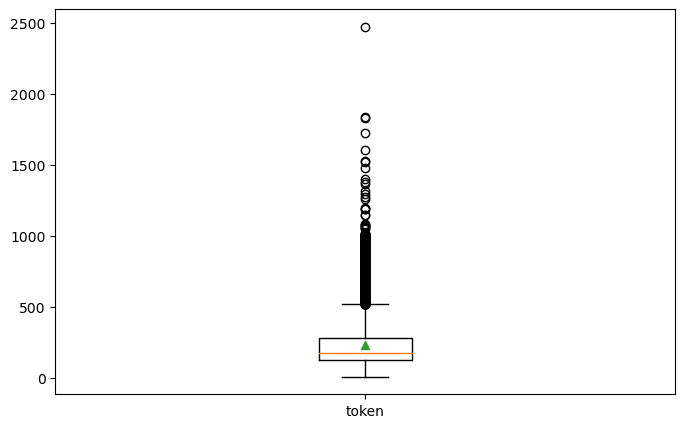

In [65]:
plt.figure(figsize=(8, 5))
plt.boxplot(tokenized_review_len, labels=['token'], showmeans=True)
plt.show()

In [2]:
from wordcloud import WordCloud, STOPWORDS

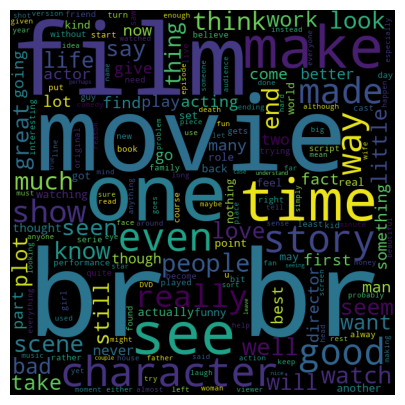

In [68]:
word_cloud = WordCloud(stopwords=STOPWORDS, width=600, height=600).generate(' '.join(review))
plt.figure(figsize=(8,5))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [3]:
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']
targets = np.array([[1], [0], [1], [1], [0], [1]])

[우분투 한글 폰트 적용](https://incomeplus.tistory.com/255)

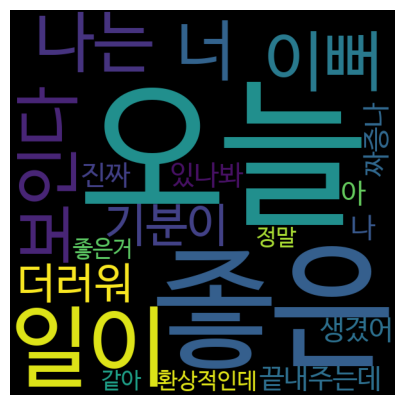

In [6]:
word_cloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', stopwords=STOPWORDS, width=600, height=600).generate(' '.join(samples))

plt.figure(figsize=(8,5))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [73]:
tokenizer_tf = tf.keras.preprocessing.text.Tokenizer()

In [78]:
tokenizer_tf.fit_on_texts(samples)
sequences = tokenizer_tf.texts_to_sequences(samples)
input_sequences = np.array(sequences)
print(tokenizer_tf.word_index)
print(input_sequences)

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}
[[ 4  1  5  6]
 [ 7  1  8  9]
 [10  2  3 11]
 [12  2  3 13]
 [14  1 15 16]
 [17 18 19 20]]


In [80]:
## tensorflow model
class mynlp(tf.keras.Model):
    def __init__(self, vocab_size, embed_size, hidden, outputs):
        super(mynlp, self).__init__(name = 'my_nlp')
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_size, name = 'embedding')
        self.hidden = tf.keras.layers.Dense(hidden, 'relu', name = 'dense')
        self.outputs = tf.keras.layers.Dense(outputs, 'sigmoid', name = 'output')
    def call(self, inputs):
        x = self.embed(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.hidden(x)
        x = self.outputs(x)

        return x
    


In [82]:
mymodel = mynlp(21, 100, 32, 1)

In [84]:
mymodel.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['acc'])
mymodel.fit(input_sequences, targets, epochs=100, batch_size=2)

Epoch 1/100
3/3 [==============================] - 2s 5ms/step - loss: 0.6915 - acc: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6792 - acc: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6692 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6594 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6498 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6402 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6287 - acc: 1.0000
Epoch 8/100


2023-03-15 10:38:15.040227: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 [==============================] - 0s 5ms/step - loss: 0.6168 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6036 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5900 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5740 - acc: 1.0000
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5570 - acc: 1.0000
Epoch 13/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5389 - acc: 1.0000
Epoch 14/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5179 - acc: 1.0000
Epoch 15/100
3/3 [==============================] - 0s 7ms/step - loss: 0.4961 - acc: 1.0000
Epoch 16/100
3/3 [==============================] - 0s 7ms/step - loss: 0.4728 - acc: 1.0000
Epoch 17/100
3/3 [==============================] - 0s 8ms/step - loss: 0.4465 - acc: 1.0000
Epoch 18/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4210 - ac

In [85]:
from konlpy.tag import Okt

In [87]:
text = '한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ'

In [88]:
okt = Okt()

In [92]:
print(okt.nouns(text))
print(okt.morphs(text))
print(okt.phrases(text))
print(okt.pos(text))

['한글', '자연어', '처리', '이제']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [93]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [94]:
sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."

In [95]:
print(word_tokenize(sentence))
print(sent_tokenize(sentence))

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']
['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.']


### 4. 텍스트 분류

In [8]:
! kaggle competitions download -c word2vec-nlp-tutorial

100%|██████████████████████████████████████| 51.7M/51.7M [00:04<00:00, 11.6MB/s]
100%|██████████████████████████████████████| 51.7M/51.7M [00:04<00:00, 11.5MB/s]


In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_data = pd.read_csv('./data_in/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3) # tab 으로 구분되어 있음

In [11]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [18]:
## word EDA (word 길이를 사용하는데는 벡터의 길이 정할때 사용함)
review = train_data['review']
tokenized_review_len = [len(r.split()) for r in review]
alphabet_review_len = [len(r.replace(' ', '')) for r in review]

In [19]:
print(tokenized_review_len)
print(alphabet_review_len)

[433, 158, 378, 379, 367, 89, 112, 132, 163, 43, 48, 172, 382, 130, 112, 187, 395, 456, 241, 118, 231, 274, 254, 43, 38, 141, 225, 254, 670, 123, 54, 116, 120, 328, 373, 284, 135, 115, 169, 542, 250, 140, 121, 174, 164, 115, 80, 134, 252, 194, 161, 97, 212, 140, 57, 139, 148, 170, 72, 379, 515, 226, 132, 137, 122, 55, 968, 73, 194, 129, 128, 425, 184, 185, 130, 146, 263, 92, 192, 138, 133, 273, 420, 191, 428, 294, 346, 51, 124, 110, 107, 117, 124, 136, 136, 141, 165, 73, 197, 84, 215, 869, 94, 165, 48, 107, 125, 121, 361, 423, 183, 208, 321, 69, 117, 227, 124, 156, 106, 127, 187, 365, 136, 274, 337, 804, 463, 325, 111, 214, 133, 618, 166, 569, 425, 26, 328, 177, 168, 136, 166, 272, 165, 156, 255, 184, 169, 281, 334, 113, 83, 179, 161, 313, 288, 97, 225, 351, 453, 167, 344, 219, 104, 141, 243, 132, 933, 136, 112, 153, 171, 216, 282, 143, 440, 133, 349, 130, 152, 222, 445, 418, 789, 126, 221, 138, 85, 395, 119, 135, 771, 106, 67, 157, 74, 278, 74, 276, 224, 102, 110, 241, 121, 272, 874, 

In [21]:
train_len = train_data['review'].str.replace(' ', '').apply(len) # alphabet_review_len과 똑같음
print(train_len)

0        1872
1         791
2        2074
3        1869
4        1867
         ... 
24995     488
24996     804
24997     517
24998     947
24999     761
Name: review, Length: 25000, dtype: int64


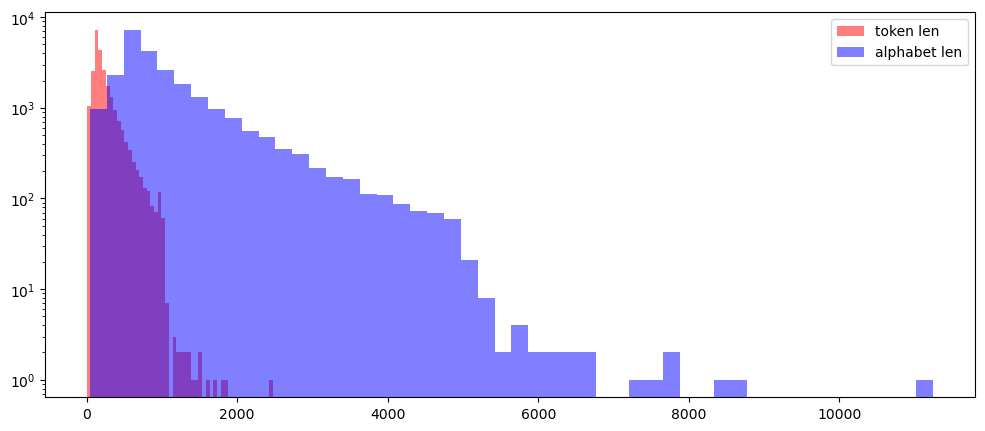

In [29]:
plt.figure(figsize=(12,5))
plt.hist(tokenized_review_len, bins = 50, color = 'red', alpha = 0.5, label= 'token len')
plt.hist(alphabet_review_len, bins = 50, color = 'blue', alpha = 0.5, label= 'alphabet len')
plt.yscale('log')
plt.legend()
plt.show()

In [37]:
word_summary(tokenized_review_len, 'word') # 평균 혹은 중간값으로 설정함 (vocab_size 설정 시)
print()
word_summary(alphabet_review_len, 'alphabet')

word 최대 크기: 2470
word 최소 크기: 10
word 평균 크기: 233.78824
word 표준 편차: 173.73034909796965
word 중간값: 174.0
word 1사분위수: 127.0
word 3사분위수: 284.0

alphabet 최대 크기: 11241
alphabet 최소 크기: 45
alphabet 평균 크기: 1096.92432
alphabet 표준 편차: 832.1568658086874
alphabet 중간값: 809.0
alphabet 1사분위수: 579.0
alphabet 3사분위수: 1335.25


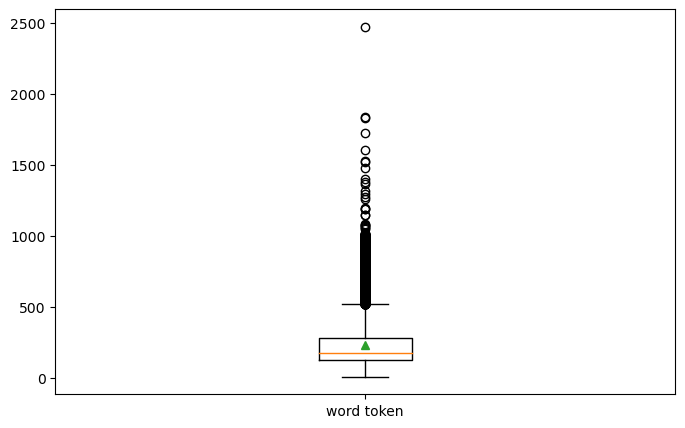

In [39]:
plt.figure(figsize=(8,5))
plt.boxplot(tokenized_review_len, labels=['word token'], showmeans=True)
plt.show()

In [40]:
from wordcloud import WordCloud, STOPWORDS

In [58]:
type(STOPWORDS)
my_stopwords = ['br', 'movie', 'see', 'film', 'make', 'one', 'time', 'story', 'movies', 'people', 'much', 'scene', 'made', 'take', 'end', 'show', 'way', 'take', 'say','character','even','think','first','know','watch','look','really','films','seen','plot','charactgers','life','acting','actor','little','actor','acting','still','work','many','characters','want','going','makes','thing','something','two','director','find','give','now','part','man','another'] + list(STOPWORDS)

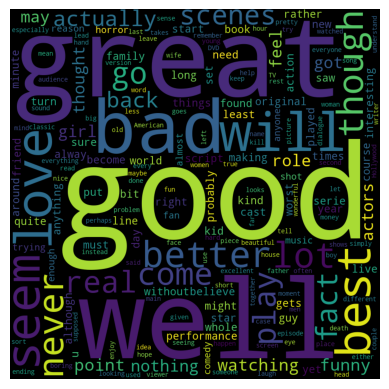

In [60]:
word_cloud = WordCloud(stopwords=my_stopwords, width=800, height=800).generate(' '.join(review))

plt.figure()
plt.imshow(word_cloud)
plt.axis('off')
plt.show()